In [12]:
import numpy
import scipy
import scipy.cluster.hierarchy as sch
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

%matplotlib inline

In [13]:
def fileToDict(file_name):
    with open(file_name) as in_file:
        dic = {}
        header = in_file.readline().strip().split(",")
        for idx in xrange(len(header)):
            header[idx]  =  header[idx]
            dic[header[idx]] = []

        for line in in_file:
            line = line.strip().split(",")
            for idx in xrange(len(line)):
                val = line[idx]
                try:
                    val = numpy.double(val)
                except ValueError:
                    pass
                dic[header[idx]].append(val)
            
    return dic, header

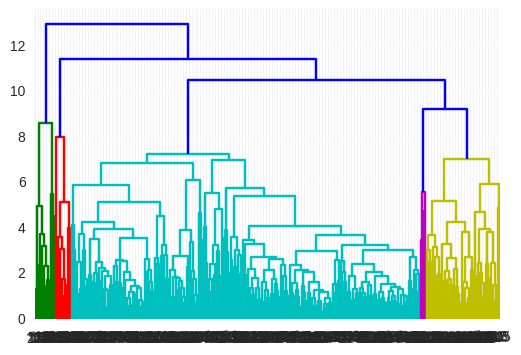

In [11]:
fileDic, header = fileToDict("/home/steen176/advbioinf/cluster/20161122_MayAppleExpressionData.csv")
#Use Gene Name as row names
df = pd.DataFrame(fileDic, index = fileDic["Gene Name"]
                  , columns = header[1:])





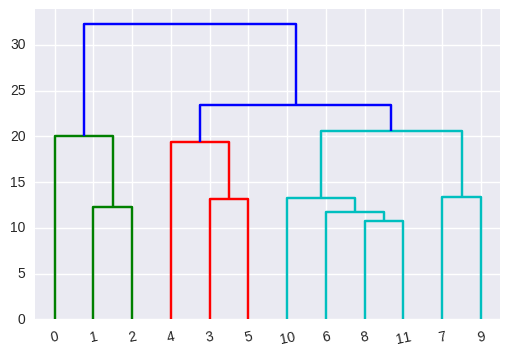

In [17]:
#Timepoint as  cluster
df = df.transpose()
#print(df)
distances = sch.distance.pdist(df, metric="euclidean")
clustering = sch.linkage(distances, method='complete')
tree = sch.dendrogram(clustering)

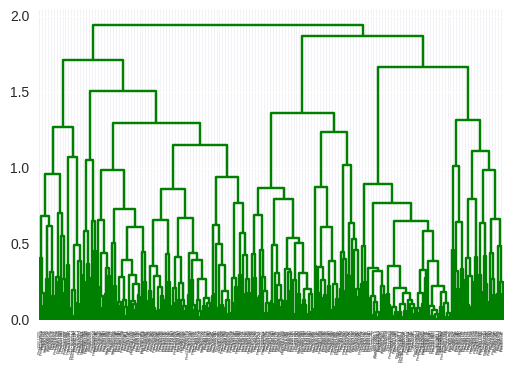

In [16]:
#Genes as cluster
distances = sch.distance.pdist(df, metric = "correlation")
clustering = sch.linkage(distances, method="complete")
tree = sch.dendrogram(clustering, leaf_font_size=2,
                        color_threshold = 4, labels = fileDic["Gene Name"])

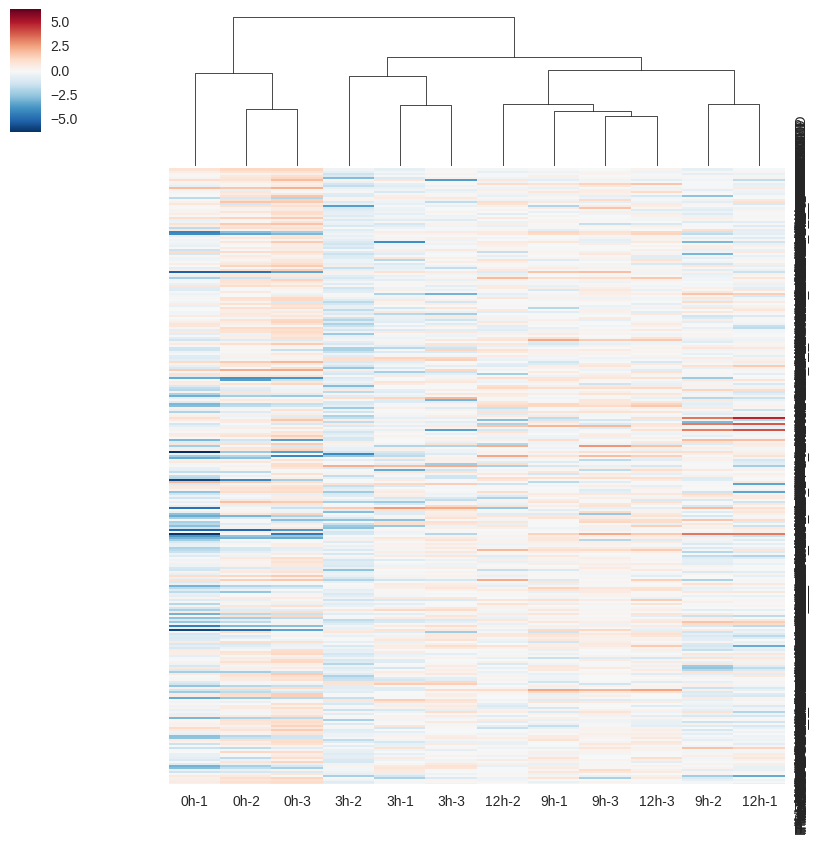

In [33]:
sns.clustermap(df.transpose(), method="complete", 
               metric="euclidean", row_cluster=False)